In [1]:
import pickle # for serializing maps.
import pandas as pd # for manipulating tables.
import matplotlib # for visualizing maps
import matplotlib.pyplot as plt # for visualizing maps.
import folium # for creating maps.
import cv2 as cv # for manipulating images.
from tqdm import tqdm_notebook as tqdm # for seeing progress bar.
import utils

In [3]:
# Read station metadata.
stations = pd.read_csv("input/stations.csv")
stations = stations.sort_values("id").reset_index(drop=True)
stations.head()

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604


In [4]:
# Read air_quality data by station_id.
air_quality = pd.concat([utils.read_air_quality(station_id) for station_id in tqdm(stations["id"])], sort=False)
air_quality = air_quality.reset_index()
air_quality.columns = air_quality.columns.str.lower()
air_quality.head()

,date,co,no,no_2,nox,o_3,pm10,so_2,station_id,ben,ch4,ebe,nmhc,pm25,tch,tol,mxy,oxy,pxy
0,2001-08-01 01:00:00,0.47,NaN,69.790001,73.449997,40.650002,69.779999,6.46,28079004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-08-01 02:00:00,0.33,NaN,64.110001,66.849998,45.230000,47.509998,6.41,28079004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-08-01 03:00:00,0.27,NaN,60.349998,62.610001,49.610001,42.110001,5.88,28079004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-08-01 04:00:00,0.21,NaN,48.689999,49.959999,61.830002,27.250000,5.29,28079004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-08-01 05:00:00,0.18,NaN,46.189999,47.320000,62.889999,31.520000,5.31,28079004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Reorder columns with pk_cols first.
pk_cols = ["station_id", "date"]
cols = air_quality.columns.tolist()
cols = pk_cols + [c for c in cols if c not in pk_cols]
air_quality = air_quality[cols]
air_quality = air_quality.sort_values(pk_cols).reset_index(drop=True)
air_quality.head()

,station_id,date,co,no,no_2,nox,o_3,pm10,so_2,ben,ch4,ebe,nmhc,pm25,tch,tol,mxy,oxy,pxy
0,28079004,2001-01-01 01:00:00,1.05,NaN,50.240002,132.699997,5.98,19.650000,20.610001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28079004,2001-01-01 02:00:00,1.77,NaN,47.970001,155.699997,6.13,38.730000,22.860001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28079004,2001-01-01 03:00:00,2.43,NaN,43.849998,222.600006,6.11,38.490002,24.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28079004,2001-01-01 04:00:00,2.06,NaN,44.500000,227.300003,6.29,45.369999,22.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28079004,2001-01-01 05:00:00,1.66,NaN,47.740002,200.699997,6.51,34.590000,21.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Add temporal information (month, weekday, hour).
air_quality["date_month"] = air_quality["date"].dt.month
air_quality["date_weekday"] = air_quality["date"].dt.weekday
air_quality["date_hour"] = air_quality["date"].dt.hour
air_quality.head()

,station_id,date,co,no,no_2,nox,o_3,pm10,so_2,ben,...,nmhc,pm25,tch,tol,mxy,oxy,pxy,date_month,date_weekday,date_hour
0,28079004,2001-01-01 01:00:00,1.05,NaN,50.240002,132.699997,5.98,19.650000,20.610001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
1,28079004,2001-01-01 02:00:00,1.77,NaN,47.970001,155.699997,6.13,38.730000,22.860001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2
2,28079004,2001-01-01 03:00:00,2.43,NaN,43.849998,222.600006,6.11,38.490002,24.910000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,3
3,28079004,2001-01-01 04:00:00,2.06,NaN,44.500000,227.300003,6.29,45.369999,22.400000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,4
4,28079004,2001-01-01 05:00:00,1.66,NaN,47.740002,200.699997,6.51,34.590000,21.600000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,5


In [7]:
# Creates colormap and reverse colormap.
cmap = matplotlib.cm.get_cmap("RdYlGn")
cmap_r = matplotlib.colors.LinearSegmentedColormap(cmap, matplotlib.cm.revcmap(cmap._segmentdata))

In [8]:
# Group air_quality by date_hour and station_id and calculate mean and sem for no_2.
air_quality_hour_station = air_quality.groupby(["date_hour", "station_id"]).agg({"no_2": ["mean"]}).reset_index()
air_quality_hour_station.columns = air_quality_hour_station.columns.droplevel(level=0)
air_quality_hour_station.columns = ["date_hour", "station_id", "no_2_mean"]
air_quality_hour_station.head()

,date_hour,station_id,no_2_mean
0,0,28079004,64.907320
1,0,28079008,75.554630
2,0,28079011,59.368578
3,0,28079016,55.241311
4,0,28079017,62.521822


In [9]:
# Interpolate intra-hour values.
air_quality_hour_station = air_quality_hour_station.groupby("station_id").apply(lambda x: utils.interpolate(x, "date_hour", "no_2_mean"))
air_quality_hour_station = air_quality_hour_station.reset_index()
air_quality_hour_station = air_quality_hour_station.drop("level_1", axis=1)
air_quality_hour_station.head()

,station_id,date_hour,no_2_mean
0,28079004,0.000000,64.907320
1,28079004,0.083333,64.146728
2,28079004,0.166667,63.411506
3,28079004,0.250000,62.700186
4,28079004,0.333333,62.011304


In [10]:
# Scale no_2_mean.
air_quality_hour_station["no_2_mean_scaled"] = utils.min_max_scale_series(air_quality_hour_station["no_2_mean"], 0, 1)
air_quality_hour_station.head()

,station_id,date_hour,no_2_mean,no_2_mean_scaled
0,28079004,0.000000,64.907320,0.700528
1,28079004,0.083333,64.146728,0.692319
2,28079004,0.166667,63.411506,0.684384
3,28079004,0.250000,62.700186,0.676707
4,28079004,0.333333,62.011304,0.669272


In [11]:
# Merge air_quality_hour_station with stations metadata.
air_quality_hour_station = air_quality_hour_station.merge(stations, how="left", left_on="station_id", right_on="id")
air_quality_hour_station.head()

,station_id,date_hour,no_2_mean,no_2_mean_scaled,id,name,address,lon,lat,elevation
0,28079004,0.000000,64.907320,0.700528,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079004,0.083333,64.146728,0.692319,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
2,28079004,0.166667,63.411506,0.684384,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
3,28079004,0.250000,62.700186,0.676707,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
4,28079004,0.333333,62.011304,0.669272,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635


In [11]:
def plot_map(df,
             location=(40.4168, -3.7038),
             width=1280,
             height=1280,
             zoom_start=12,
             tiles="CartoDB dark_matter",
             exclude_buttons=True,
             lat="lat",
             lon="lon",
             radius="no_2_mean_scaled",
             radius_min=2.5,
             radius_max=10,
             cmap=cmap_r,
             color="no_2_mean_scaled",
             fill=True
            ):
    m = utils.make_map(location, width, height, zoom_start, tiles, exclude_buttons)
    for i, r in df.iterrows():
        marker = folium.CircleMarker(location=(r[lat], r[lon]),
                                     radius=r[radius] * (radius_max - radius_min) + radius_min,
                                     color = matplotlib.colors.rgb2hex(cmap(r[color])),
                                     fill=fill)
        marker.add_to(m)
    m = utils.process_map(m)
    m = cv.cvtColor(m, cv.COLOR_BGR2RGB)
    
    return m    

In [12]:
# Create maps for 5 minute intervals.
maps = []
for i, df in tqdm(air_quality_hour_station.groupby("date_hour")):
    m = plot_map(df, height=1000)   
    maps.append((i, m))

C:\Users\Jan\Anaconda3\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [16]:
# Export frames.
with open("maps.p", "wb") as f:
    pickle.dump(maps, f)

In [33]:
# Detect corrupted frames.
corrupt_frames = []

for i, m in maps:
    m_small = cv.resize(m, (480, 480), cv.INTER_NEAREST)
    cv.imshow("maps", m_small)
    cv.moveWindow("maps", 20, 20)
    cv.waitKey(10)
    correct_input = False
    while not correct_input:
        ri = raw_input()
        if ri == "":
            ri = "y"
        if ri == "y":
            print("it's a yes.")
            correct_input = True
        elif ri == "n":
            print("it's a no.")
            corrupt_frames.append(i)
            correct_input = True
        else:
            print("i dont't know. try again.")
cv.destroyAllWindows()

it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


 n


it's a no.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


 n


it's a no.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


 n


it's a no.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


 n


it's a no.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


 n


it's a no.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


 n


it's a no.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


it's a yes.


 n


it's a no.


In [43]:
# Fix corrupt frames.
corrupt_frames 

[0.5,
 1.0,
 4.666666666666666,
 9.583333333333332,
 18.0,
 21.916666666666664,
 23.916666666666664]

In [51]:
# Fix corrupt frames.
[int(round(c*12)) for c in corrupt_frames]

[6, 12, 56, 115, 216, 263, 287]

In [80]:
# This is out of sequence, you need to run this for every corrupt frame.
i = 287
v = 23.916666666666664
df = air_quality_hour_station.groupby("date_hour").get_group(v)
m = plot_map(df, height=1000)
maps[i] = (v, m)

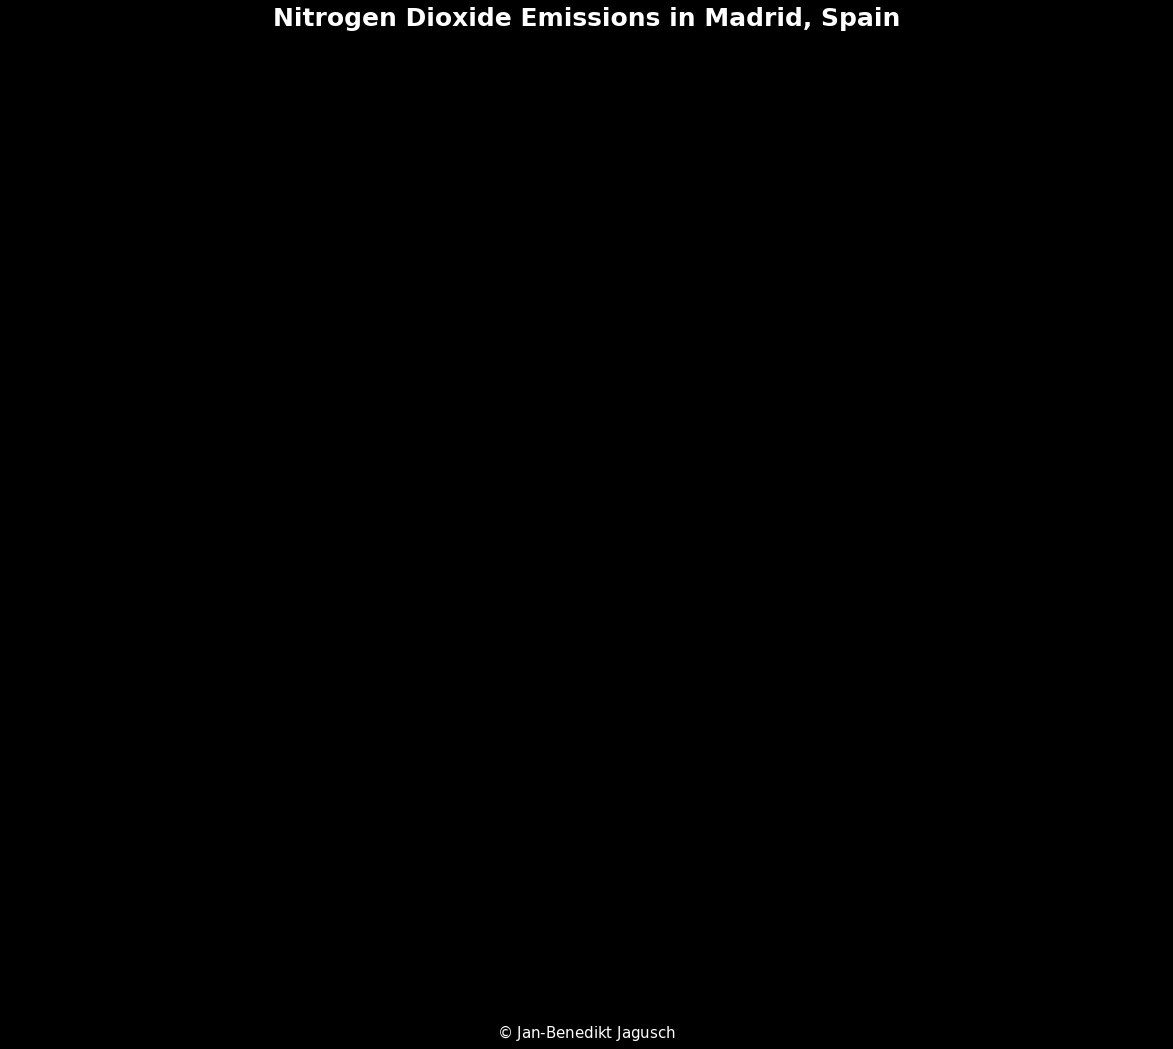

In [93]:
# Create animation.
import matplotlib.animation as animation
ims = []

fig = plt.figure(figsize=(16, 16), facecolor="black")
ax = fig.gca()
ax.axis("off")
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.set_facecolor("black")
plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0.05)

title = "Nitrogen Dioxide Emissions in Madrid, Spain"
plt.suptitle(title, color="white", size=25, weight="bold")
plt.text(0.5, -0.025, r"$\copyright$ Jan-Benedikt Jagusch", color="white", transform=ax.transAxes, ha="center", va="center", size=15)
               
def updatefig(i):
    time_text.set_text(utils.time_decimal_to_string(float(i)/12.))
    return time_text,

ims = []
for i, m in tqdm(enumerate(maps)):
    
    time = utils.time_decimal_to_string(i/12.)
    time_text = ax.text(0.5, 1.025, time, color="white", transform=ax.transAxes, ha="center", va="center", size=20, animated=True)   
    im = ax.imshow(m[1], animated=True)
    ims.append([im, time_text])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

In [94]:
# Save animation.
ani.save('dynamic-map.mp4', dpi=80, savefig_kwargs={'facecolor':'black'})